### 關於 Logistic Regression: 
Logistic Regression是一個二元分類模型，能預測結果是A還是B及是A或是B的機率是多少.
這種應用在我們生活中非常常見，比如說我們要根據今天的溫度、濕度、風向來預測明天的天氣，通常我們會需要知道明天是晴天的機率以及雨天的機率，來決定是否帶傘具出門。如果使用Logistic Regression就可以幫我們達成這樣的目標!

Logistic Regression是一個平滑的曲線，當$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}+b$$越大時判斷成A類的機率越大，越小時判斷成A類的機率越小。由於是二元分類，如果判斷成A類的機率越小，B類的機率越大 ( 1 - 判斷成A的機率)。



### Sigmoid函數: 
亦稱為logistic function，這個函數的y 的值介於 0~1，這樣的分布也符合機率是在0~1的範圍中。

$$ 0\leq  sigmod(z)\leq 1$$


依下圖所示，當Z=0時判斷成A類的機率為0.5，因此只要 z >0 判斷成 A類的機率就會>0.5如果z≤0 判斷成A類的機率就≤0.5 ，因此我們就把他判斷成B類

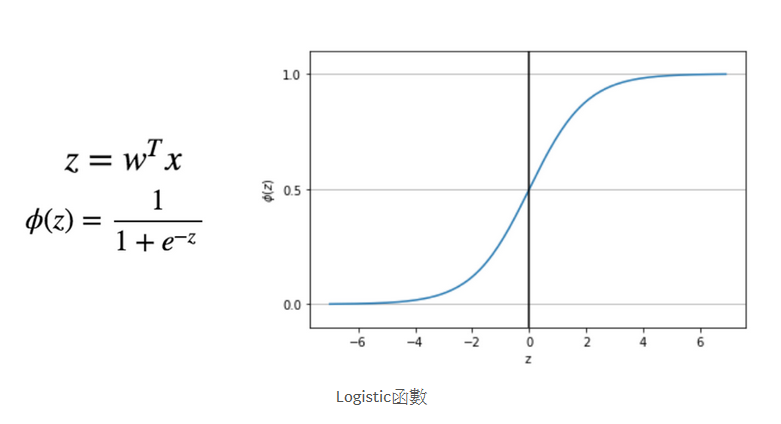

### Logistic Regression要怎麼找到一條線，將兩群做線性分類: 


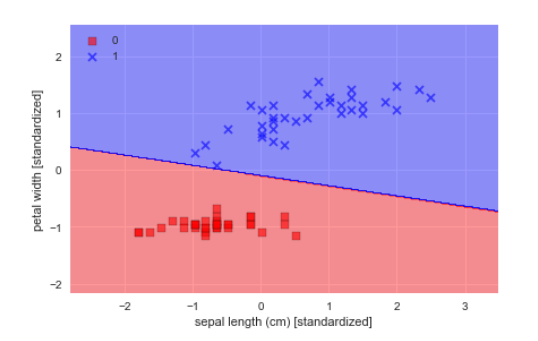

為了數學推導方便，將A類改以+1表示、B類以0表示。我們想要找到一組w，能夠將下方的式子變成最大值，那組w就是我們要找的線(z=WX)。下方的式子是希望當y=1的時候∅(z) 越靠近1（判斷成A類的機率越大），由於1-y是0所以右邊的項會是1，當y=0時左邊這項會是1右邊這項希望 ∅(z) 越靠近0越好（判斷成B類的機率越大）。

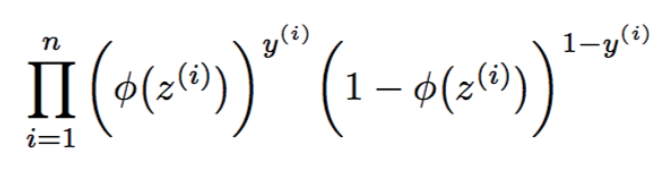

## 載入Iris資料集


In [34]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import utility.py
from utility import plot_confusion_matrix,plot_decision_regions

In [35]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','target']]

#只挑出 target是0和1的出來,因為要做二元分類
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(5)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


使用sklearn中的model_selection函式將把資料分為兩群tarin、test，將來可使用test資料來檢驗我們的分類模型效果

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','sepal width (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

## 使用Logistic Regression之前需要先對資料做特徵縮放 



In [37]:
X_train

,sepal length (cm),sepal width (cm)
60,5.0,2.0
80,5.5,2.4
90,5.5,2.6
68,6.2,2.2
51,6.4,3.2
...,...,...
96,5.7,2.9
67,5.8,2.7
64,5.6,2.9
47,4.6,3.2


##  Standardization

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
sc = StandardScaler().fit(X_test)
X_test_std = sc.transform(X_test)

#method 2: by pandas
#(X_train-X_train.mean())/X_train.std()
#(X_test-X_test.mean())/X_test.std()

In [39]:
X_train_std[0:10]

array([[-0.80800774, -2.29964195],
       [ 0.01648995, -1.47624074],
       [ 0.01648995, -1.06454014],
       [ 1.17078673, -1.88794135],
       [ 1.50058581,  0.17056168],
       [-0.47820866,  0.78811259],
       [ 0.34628903,  1.4056635 ],
       [ 1.33568627,  0.37641198],
       [ 1.00588719, -0.44698923],
       [ 1.50058581, -0.44698923]])

In [40]:
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

## 訓練

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train['target'].values)

LogisticRegression()

In [43]:
lr2 = LogisticRegression(solver='lbfgs')
lr2.fit(X_train_std,y_train['target'].values)

LogisticRegression()

In [44]:
lr.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [45]:
lr2.predict(X_train_std)

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [46]:
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

## 手算驗證
  $$z=xw+b=w_{1}x_{1}+w_{2}x_{2}+b$$
    $$probability=sigmod(z)$$

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

#Y=WX+b


#before Standardization
W=lr.coef_
b=lr.intercept_
z=np.dot(X_train,W.T)+b #[[70,2]dot([2,1])]=[[70,1]]
z=np.ravel(z)  #[[70,1]]==>[70,1]
prob=sigmoid(z)
print(prob[:])
print('-'*100)
#After Standardization

W=lr2.coef_
b=lr2.intercept_
z2=np.dot(X_train_std,W.T)+b #[[70,2]dot([2,1])]=[[70,1]]
z2=np.ravel(z2)  #[[70,1]]==>[70,1]
prob2=sigmoid(z2)
print(prob2[:])


[0.86034884 0.8898624  0.82494618 0.98920229 0.91386402 0.15638183
 0.24145894 0.86084486 0.91378889 0.95970591 0.24099323 0.82512982
 0.04583788 0.41584676 0.07623036 0.05941069 0.1239795  0.09751489
 0.07609609 0.09762691 0.89004929 0.6156316  0.1239795  0.1951641
 0.19531402 0.98167507 0.07618558 0.19521406 0.19526403 0.98166935
 0.15646576 0.29398748 0.67740579 0.6154058  0.88992473 0.67768373
 0.03547751 0.55036054 0.19561411 0.86053979 0.05930414 0.09743095
 0.15629793 0.93280983 0.67705819 0.88989357 0.29398748 0.82499211
 0.98163498 0.97611869 0.2937235  0.05926867 0.8898624  0.05930414
 0.15633988 0.96895956 0.97611127 0.19511415 0.67740579 0.73348668
 0.98920569 0.2940535  0.07625276 0.93276995 0.1951641  0.78267183
 0.88995588 0.73330012 0.07614082 0.05930414]
----------------------------------------------------------------------------------------------------
[0.95844243 0.96754376 0.92606341 0.99913271 0.97096993 0.07116657
 0.13253807 0.93572891 0.97381718 0.9919233  0.168

In [48]:
#Before Standardization
predictions = np.round(prob).astype('int32')
print(predictions)
accuracy = np.mean(predictions == y_train['target'].values)
print('\n accuracy(before):',accuracy)
print()

#After Standardization
predictions = np.round(prob2).astype('int32')
print(predictions)
accuracy = np.mean(predictions == y_train['target'].values)
print('\n accuracy(after):',accuracy)

[1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]

 accuracy(before): 1.0

[1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]

 accuracy(after): 1.0


## 視覺化訓練資料分類結果

C:\Users\william\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\william\Desktop\machine learning\Unit 5 info\Unit05\Unit05\utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


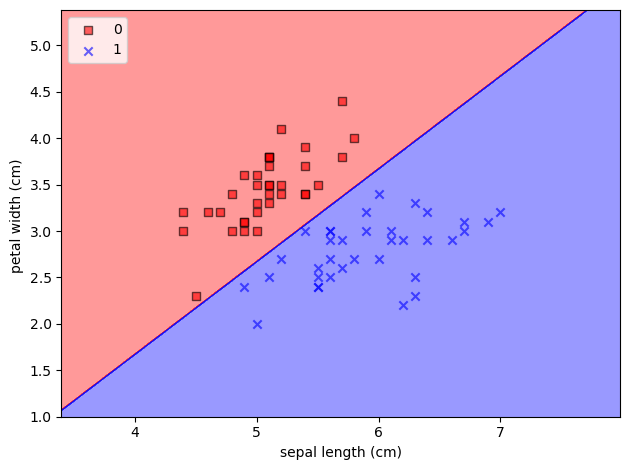

In [50]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm) ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\william\Desktop\machine learning\Unit 5 info\Unit05\Unit05\utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


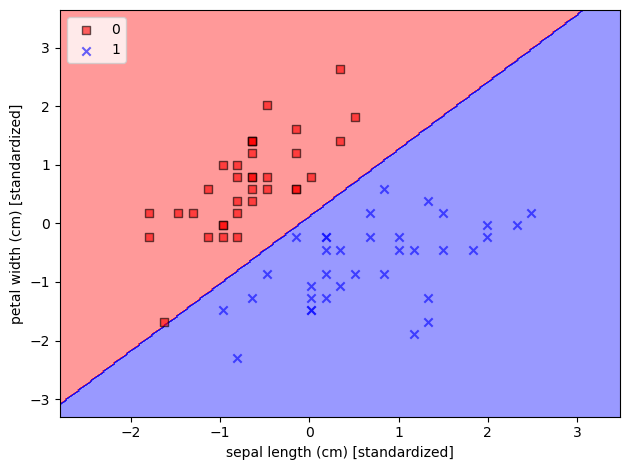

In [32]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=lr2)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 計算測試資料分類錯誤的個數

In [114]:
lr2.predict(X_test_std)

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2])

In [115]:
y_test['target'].values

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2])

In [116]:
#before
error = 0
for i, v in enumerate(lr.predict(X_test)):
    if v!= y_test['target'].values[i]:
        error+=1
print('the number of errors:',error)

the number of errors: 10


In [117]:
#after
error = 0
for i, v in enumerate(lr2.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print('the number of errors:',error)

the number of errors: 9


## predict_proba() 輸出預測機率

In [118]:
lr2.predict_proba(X_test_std)[0:10]

array([[0.22251425, 0.77748575],
       [0.38820826, 0.61179174],
       [0.17605581, 0.82394419],
       [0.05253459, 0.94746541],
       [0.10278242, 0.89721758],
       [0.20137472, 0.79862528],
       [0.74125077, 0.25874923],
       [0.4419598 , 0.5580402 ],
       [0.32680319, 0.67319681],
       [0.24653857, 0.75346143]])

In [119]:
lr.predict_proba(X_test)[0:10]

array([[0.30191231, 0.69808769],
       [0.45727092, 0.54272908],
       [0.25430143, 0.74569857],
       [0.10037658, 0.89962342],
       [0.16937414, 0.83062586],
       [0.28141296, 0.71858704],
       [0.74459338, 0.25540662],
       [0.50059074, 0.49940926],
       [0.40170125, 0.59829875],
       [0.32636228, 0.67363772]])

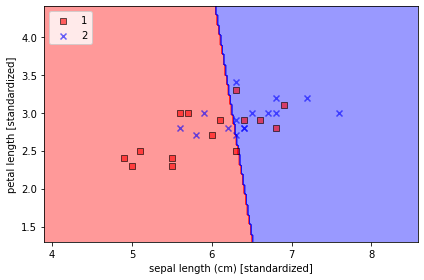

In [120]:
plot_decision_regions(X_test.values, y_test['target'].values, classifier=lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

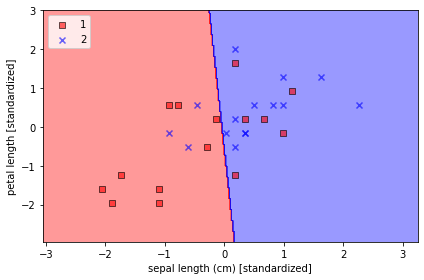

In [121]:
plot_decision_regions(X_test_std, y_test['target'].values, classifier=lr2)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Logistic Regression優點：

    資料線性可分 linear-separable (包含在高維度空間找到的linear plane)
    可以獲得A類跟B類的機率
    執行速度非常快
![image.png](attachment:image.png)

Logistic Regression缺點：

    線的切法不夠漂亮，以人的觀察應該要大概要像是綠色的線才是一個比較好的分法（SVM將會解決這個問題）
    
![11.PNG](attachment:11.PNG)